In [1]:


# =======================
# 1. Configuration Variables
# =======================

# Define the list of run names you want to compare
#RUN_NAMES = ['run_ULM', 'run_base','run_case_1', 'run_case_2']  # Add as many runs as needed
RUN_NAMES = ['run_ULM','run_case_1', 'run_case_2'] 
# Define the absolute base path where all run data is stored
BASE_PATH = 'C:/Users/Kostas/Documents/GitHub/Diplomatiki_kwpap_step_1/2024 Project v2/data/exp7'  # Replace with your actual path

# Shift step to ensure unique IDs across runs
SHIFT_STEP = 100
# =======================
# 2. Imports
# =======================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
def apply_shift(df, shift, id_column='id', fk_columns=None):
    """
    Shifts the ID and foreign key columns in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to shift.
    - shift (int): The value to add to the IDs.
    - id_column (str): The name of the ID column to shift.
    - fk_columns (list of str): List of foreign key column names to shift.
    
    Returns:
    - pd.DataFrame: The shifted DataFrame.
    """
    df_shifted = df.copy()
    
    # Shift the ID column
    df_shifted[id_column] = df_shifted[id_column] + shift
    
    # Shift foreign key columns if provided
    if fk_columns:
        for fk in fk_columns:
            if fk in df_shifted.columns:
                df_shifted[fk] = df_shifted[fk] + shift
    
    return df_shifted

def load_regulator_data(run_names, base_path, shift_step):
    """
    Loads Regulator data from multiple runs and combines them into a single DataFrame with shifted IDs.
    
    Parameters:
    - run_names (list): List of run names to load.
    - base_path (str): Base directory where run data is stored.
    - shift_step (int): The value to add per run to shift IDs.
    
    Returns:
    - pd.DataFrame: Combined Regulator data with shifted IDs and a 'run_name' column.
    """
    regulator_dfs = []
    
    for index, run in enumerate(run_names):
        shift = shift_step * index
        regulator_csv = os.path.join(base_path, run, 'data', f'{run}_regulator.csv')
        
        if not os.path.exists(regulator_csv):
            print(f"Warning: {regulator_csv} does not exist. Skipping this run.")
            continue
        
        df = pd.read_csv(regulator_csv)
        df = apply_shift(df, shift, id_column='id')
        df['run_name'] = run
        regulator_dfs.append(df)
    
    if regulator_dfs:
        combined_regulator = pd.concat(regulator_dfs, ignore_index=True)
        return combined_regulator
    else:
        print("No Regulator data loaded.")
        return pd.DataFrame()

def load_countries_data(run_names, base_path, shift_step):
    """
    Loads Countries data from multiple runs and combines them into a single DataFrame with shifted IDs.
    
    Parameters:
    - run_names (list): List of run names to load.
    - base_path (str): Base directory where run data is stored.
    - shift_step (int): The value to add per run to shift IDs.
    
    Returns:
    - pd.DataFrame: Combined Countries data with shifted IDs and a 'run_name' column.
    """
    countries_dfs = []
    
    for index, run in enumerate(run_names):
        shift = shift_step * index
        countries_csv = os.path.join(base_path, run, 'data', f'{run}_countries.csv')
        
        if not os.path.exists(countries_csv):
            print(f"Warning: {countries_csv} does not exist. Skipping this run.")
            continue
        
        df = pd.read_csv(countries_csv)
        df = apply_shift(df, shift, id_column='id')
        df['run_name'] = run
        countries_dfs.append(df)
    
    if countries_dfs:
        combined_countries = pd.concat(countries_dfs, ignore_index=True)
        return combined_countries
    else:
        print("No Countries data loaded.")
        return pd.DataFrame()

def load_sectors_data(run_names, base_path, shift_step):
    """
    Loads Sectors data from multiple runs and combines them into a single DataFrame with shifted IDs.
    
    Parameters:
    - run_names (list): List of run names to load.
    - base_path (str): Base directory where run data is stored.
    - shift_step (int): The value to add per run to shift IDs.
    
    Returns:
    - pd.DataFrame: Combined Sectors data with shifted IDs and a 'run_name' column.
    """
    sectors_dfs = []
    
    for index, run in enumerate(run_names):
        shift = shift_step * index
        sectors_csv = os.path.join(base_path, run, 'data', f'{run}_sectors.csv')
        
        if not os.path.exists(sectors_csv):
            print(f"Warning: {sectors_csv} does not exist. Skipping this run.")
            continue
        
        df = pd.read_csv(sectors_csv)
        df = apply_shift(df, shift, id_column='id')
        df['run_name'] = run
        sectors_dfs.append(df)
    
    if sectors_dfs:
        combined_sectors = pd.concat(sectors_dfs, ignore_index=True)
        return combined_sectors
    else:
        print("No Sectors data loaded.")
        return pd.DataFrame()

def load_firms_data(run_names, base_path, shift_step):
    """
    Loads Firms data from multiple runs and combines them into a single DataFrame with shifted IDs and foreign keys.
    
    Parameters:
    - run_names (list): List of run names to load.
    - base_path (str): Base directory where run data is stored.
    - shift_step (int): The value to add per run to shift IDs.
    
    Returns:
    - pd.DataFrame: Combined Firms data with shifted IDs, foreign keys, and a 'run_name' column.
    """
    firms_dfs = []
    
    for index, run in enumerate(run_names):
        shift = shift_step * index
        firms_csv = os.path.join(base_path, run, 'data', f'{run}_firms.csv')
        
        if not os.path.exists(firms_csv):
            print(f"Warning: {firms_csv} does not exist. Skipping this run.")
            continue
        
        df = pd.read_csv(firms_csv)
        
        # Shift 'id', 'sector_id', and 'country_id'
        df = apply_shift(df, shift, id_column='id', fk_columns=['sector_id', 'country_id'])
        df['run_name'] = run
        firms_dfs.append(df)
    
    if firms_dfs:
        combined_firms = pd.concat(firms_dfs, ignore_index=True)
        return combined_firms
    else:
        print("No Firms data loaded.")
        return pd.DataFrame()


In [3]:
# =======================
# 5. Execute Data Loading
# =======================

# Load all data across specified runs
def load_all_data(run_names, base_path, shift_step):
    """
    Loads all entities' data across multiple runs with shifted IDs and combines them.
    
    Parameters:
    - run_names (list): List of run names to load.
    - base_path (str): Base directory where run data is stored.
    - shift_step (int): The value to add per run to shift IDs.
    
    Returns:
    - dict: A dictionary containing combined DataFrames for each entity.
    """
    data = {}
    
    # Load Regulator Data
    data['regulator'] = load_regulator_data(run_names, base_path, shift_step)
    
    # Load Countries Data
    data['countries'] = load_countries_data(run_names, base_path, shift_step)
    
    # Load Sectors Data
    data['sectors'] = load_sectors_data(run_names, base_path, shift_step)
    
    # Load Firms Data
    data['firms'] = load_firms_data(run_names, base_path, shift_step)
    
    return data


In [4]:
# =======================
# 4. Execute Data Loading
# =======================

# Load all data across specified runs
data = load_all_data(RUN_NAMES, BASE_PATH, SHIFT_STEP)

# Assign DataFrames to variables for convenience
df_regulator = data['regulator']
df_countries = data['countries']
df_sectors = data['sectors']
df_firms = data['firms']

# Display the first few rows of each DataFrame to verify
print("Regulator Data:")
print(df_regulator.head())

print("\nCountries Data:")
print(df_countries.head())

print("\nSectors Data:")
print(df_sectors.head())

print("\nFirms Data:")
print(df_firms.head())


Regulator Data:
    id name  permit_price  emission_cap  BAU_emissions     BAU_profit  \
0    1  ETS     26.951625   14111.10219   17638.877738  396758.737368   
1  101  ETS     21.780756   14111.10219   17638.877738  396758.737368   
2  201  ETS     21.780756   14111.10219   17638.877738  396758.737368   

     run_name  
0     run_ULM  
1  run_case_1  
2  run_case_2  

Countries Data:
   id                   name  size  GDP_per_capita  population  \
0   1               Atlantis    50             400   100000000   
1   2                 Omashu    20             350    50000000   
2   3              Hogsmeade    10             450    20000000   
3   4  The_Court_of_Miracles     5             300    10000000   
4   5            Lilipoupoli     2             250     5000000   

   industry_percentage           GDP run_name  
0                   30  4.000000e+10  run_ULM  
1                   25  1.750000e+10  run_ULM  
2                   20  9.000000e+09  run_ULM  
3                   1

In [5]:
# =======================
# 5. Data Validation
# =======================

# Check for missing values
print("\nMissing Values in Regulator Data:")
print(df_regulator.isnull().sum())

print("\nMissing Values in Countries Data:")
print(df_countries.isnull().sum())

print("\nMissing Values in Sectors Data:")
print(df_sectors.isnull().sum())

print("\nMissing Values in Firms Data:")
print(df_firms.isnull().sum())

# Check data types
print("\nData Types in Regulator Data:")
print(df_regulator.dtypes)

print("\nData Types in Countries Data:")
print(df_countries.dtypes)

print("\nData Types in Sectors Data:")
print(df_sectors.dtypes)

print("\nData Types in Firms Data:")
print(df_firms.dtypes)

# Verify relational integrity
# Ensure all sector_id in firms exist in sectors
missing_sectors = df_firms[~df_firms['sector_id'].isin(df_sectors['id'])]
if not missing_sectors.empty:
    print("\nWarning: Some firms have sector_id not present in sectors data:")
    print(missing_sectors)
else:
    print("\nAll sector_ids in firms are valid.")

# Ensure all country_id in firms exist in countries data
missing_countries = df_firms[~df_firms['country_id'].isin(df_countries['id'])]
if not missing_countries.empty:
    print("\nWarning: Some firms have country_id not present in countries data:")
    print(missing_countries)
else:
    print("\nAll country_ids in firms are valid.")



Missing Values in Regulator Data:
id               0
name             0
permit_price     0
emission_cap     0
BAU_emissions    0
BAU_profit       0
run_name         0
dtype: int64

Missing Values in Countries Data:
id                     0
name                   0
size                   0
GDP_per_capita         0
population             0
industry_percentage    0
GDP                    0
run_name               0
dtype: int64

Missing Values in Sectors Data:
id                          0
name                        0
price_demand_function       0
free_emission_multiplier    0
consumer_surplus            0
run_name                    0
dtype: int64

Missing Values in Firms Data:
id                          0
name                        0
sector_id                   0
country_id                  0
production_cost_function    0
abatement_cost_function     0
actual_output               0
emission                    0
profit                      0
BAU_output                  0
BAU_emission  

In [6]:
df_regulator

,id,name,permit_price,emission_cap,BAU_emissions,BAU_profit,run_name
0,1,ETS,26.951625,14111.10219,17638.877738,396758.737368,run_ULM
1,101,ETS,21.780756,14111.10219,17638.877738,396758.737368,run_case_1
2,201,ETS,21.780756,14111.10219,17638.877738,396758.737368,run_case_2


In [7]:
df_firms

,id,name,sector_id,country_id,production_cost_function,abatement_cost_function,actual_output,emission,profit,BAU_output,BAU_emission,BAU_profit,exp7_free_allocation,abatement,permits_costs,sales,permits_used,free_permits,permits_bought,run_name
0,1,S1_F1,1,1,0,x**3 + 3*x**2 + 2*x,324.209085,322.156675,10541.081365,333.333662,333.333662,11111.133015,0.000000,25.387531,1719.582653,12286.051550,322.156675,258.354115,63.802560,run_ULM
1,2,S1_F2,1,1,0,2*x**3 + 2*x**2 + 3*x,324.209085,322.516820,10536.265597,333.331878,333.331878,11111.014098,0.000000,20.496801,1729.289152,12286.051550,322.516820,258.354115,64.162705,run_ULM
2,3,S1_F3,1,2,0,3*x**3 + x**2 + 4*x,324.209085,322.719407,10533.207082,333.331996,333.331996,11111.021950,0.000000,18.095271,1734.749197,12286.051550,322.719407,258.354115,64.365292,run_ULM
3,4,S1_F4,1,3,0,2*x**3 + 2*x**2 + 2*x,324.209085,322.476090,10537.978295,333.333481,333.333481,11111.120980,0.000000,19.881859,1728.191396,12286.051550,322.476090,258.354115,64.121975,run_ULM
4,5,S1_F5,1,4,0,x**3 + 3*x**2 + 3*x,324.209085,322.211774,10539.056421,333.334491,333.334491,11111.188312,0.000000,25.927470,1721.067659,12286.051550,322.211774,258.354115,63.857659,run_ULM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,226,S6_F1,206,205,0,x**3 + x**2 + x,970.320740,968.001145,13662.324448,1333.331110,1333.331110,17777.718476,193.600229,20.180749,16867.037071,30549.542268,968.001145,0.000000,774.400916,run_case_2
86,227,S6_F2,206,204,0,x**3 + 2*x**2 + x,970.320740,968.272382,13658.744655,1333.328119,1333.328119,17777.638742,193.654476,19.034355,16871.763258,30549.542268,968.272382,0.000000,774.617905,run_case_2
87,228,S6_F3,206,203,0,2*x**3 + x**2 + x,970.320740,968.618922,13657.285112,1333.331207,1333.331207,17777.721077,193.723784,14.455573,16877.801584,30549.542268,968.618922,0.000000,774.895138,run_case_2
88,229,S6_F4,206,202,0,x**3 + x**2 + 2*x,970.320740,968.064731,13660.313506,1333.335842,1333.335842,17777.844669,193.612946,21.083736,16868.145026,30549.542268,968.064731,0.000000,774.451785,run_case_2


In [8]:
df_countries

,id,name,size,GDP_per_capita,population,industry_percentage,GDP,run_name
0,1,Atlantis,50,400,100000000,30,4.000000e+10,run_ULM
1,2,Omashu,20,350,50000000,25,1.750000e+10,run_ULM
2,3,Hogsmeade,10,450,20000000,20,9.000000e+09,run_ULM
3,4,The_Court_of_Miracles,5,300,10000000,15,3.000000e+09,run_ULM
4,5,Lilipoupoli,2,250,5000000,10,1.250000e+09,run_ULM
5,101,Atlantis,50,400,1390,30,5.561712e+05,run_case_1
6,102,Omashu,20,350,1347,25,4.717929e+05,run_case_1
7,103,Hogsmeade,10,450,1310,20,5.897411e+05,run_case_1
8,104,The_Court_of_Miracles,5,300,2621,15,7.863215e+05,run_case_1
9,105,Lilipoupoli,2,250,2761,10,6.904508e+05,run_case_1


In [9]:
df_sectors[ df_sectors['run_name'] == 'run_ULM']


,id,name,price_demand_function,free_emission_multiplier,consumer_surplus,run_name
0,1,Steel,200 - 0.1*x,0.796875,131389.413835,run_ULM
1,2,Cement,150 - 0.05*x,0.846680,147759.763091,run_ULM
2,3,Paper,100 - 0.02*x,0.049805,96075.957473,run_ULM
3,4,Chemicals,250 - 0.15*x,0.896484,141464.876131,run_ULM
4,5,Automotive,300 - 0.2*x,0.747070,149229.774424,run_ULM
5,6,Textiles,80 - 0.01*x,0.000000,97712.851795,run_ULM


In [10]:
# Use ggplot style for plots
plt.style.use('ggplot')

In [11]:
# Merge df_firms with df_countries to get country names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_countries = pd.merge(
    df_firms2,
    df_countries[['id', 'name']],
    left_on='country_id',
    right_on='id',
    suffixes=('', '_country')
).rename(columns={'name': 'country_name'})
df_firms_countries


,id,sector_id,country_id,production_cost_function,abatement_cost_function,actual_output,emission,profit,BAU_output,BAU_emission,...,exp7_free_allocation,abatement,permits_costs,sales,permits_used,free_permits,permits_bought,run_name,id_country,country_name
0,1,1,1,0,x**3 + 3*x**2 + 2*x,324.209085,322.156675,10541.081365,333.333662,333.333662,...,0.000000,25.387531,1719.582653,12286.051550,322.156675,258.354115,63.802560,run_ULM,1,Atlantis
1,2,1,1,0,2*x**3 + 2*x**2 + 3*x,324.209085,322.516820,10536.265597,333.331878,333.331878,...,0.000000,20.496801,1729.289152,12286.051550,322.516820,258.354115,64.162705,run_ULM,1,Atlantis
2,3,1,2,0,3*x**3 + x**2 + 4*x,324.209085,322.719407,10533.207082,333.331996,333.331996,...,0.000000,18.095271,1734.749197,12286.051550,322.719407,258.354115,64.365292,run_ULM,2,Omashu
3,4,1,3,0,2*x**3 + 2*x**2 + 2*x,324.209085,322.476090,10537.978295,333.333481,333.333481,...,0.000000,19.881859,1728.191396,12286.051550,322.476090,258.354115,64.121975,run_ULM,3,Hogsmeade
4,5,1,4,0,x**3 + 3*x**2 + 3*x,324.209085,322.211774,10539.056421,333.334491,333.334491,...,0.000000,25.927470,1721.067659,12286.051550,322.211774,258.354115,63.857659,run_ULM,4,The_Court_of_Miracles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,226,206,205,0,x**3 + x**2 + x,970.320740,968.001145,13662.324448,1333.331110,1333.331110,...,193.600229,20.180749,16867.037071,30549.542268,968.001145,0.000000,774.400916,run_case_2,205,Lilipoupoli
86,227,206,204,0,x**3 + 2*x**2 + x,970.320740,968.272382,13658.744655,1333.328119,1333.328119,...,193.654476,19.034355,16871.763258,30549.542268,968.272382,0.000000,774.617905,run_case_2,204,The_Court_of_Miracles
87,228,206,203,0,2*x**3 + x**2 + x,970.320740,968.618922,13657.285112,1333.331207,1333.331207,...,193.723784,14.455573,16877.801584,30549.542268,968.618922,0.000000,774.895138,run_case_2,203,Hogsmeade
88,229,206,202,0,x**3 + x**2 + 2*x,970.320740,968.064731,13660.313506,1333.335842,1333.335842,...,193.612946,21.083736,16868.145026,30549.542268,968.064731,0.000000,774.451785,run_case_2,202,Omashu


In [12]:
# 1) LaTeX Table: Sum of Profits by Country and Experiment

# Merge df_firms with df_countries to get country names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_countries = pd.merge(
    df_firms2,
    df_countries[['id', 'name']],
    left_on='country_id',
    right_on='id',
    suffixes=('', '_country')
).rename(columns={'name': 'country_name'})
df_firms_countries

# Group by 'run_name' and 'country_name', sum 'profit'
grouped_country_profit = df_firms_countries.groupby(['run_name', 'country_name'])['profit'].sum().reset_index()

# Pivot the data to have countries as rows and run_names as columns
pivot_country_profit = grouped_country_profit.pivot(index='country_name', columns='run_name', values='profit')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_country_profit = pivot_country_profit.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_country_profit = pivot_country_profit.fillna(0)

# Add a summary row for each experiment
pivot_country_profit.loc['Total'] = pivot_country_profit.sum()

# Print LaTeX table
print("LaTeX Table: Sum of Profits by Country and Experiment")
print(pivot_country_profit.to_latex(float_format="%.2f"))



LaTeX Table: Sum of Profits by Country and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
country_name &  &  &  \\
\midrule
Atlantis & 94972.42 & 119532.95 & 116030.03 \\
Hogsmeade & 61266.54 & 84828.76 & 84828.76 \\
Lilipoupoli & 27536.56 & 38794.96 & 38794.96 \\
Omashu & 61271.82 & 82529.70 & 84826.75 \\
The_Court_of_Miracles & 61266.45 & 79167.22 & 80373.09 \\
Total & 306313.79 & 404853.59 & 404853.59 \\
\bottomrule
\end{tabular}



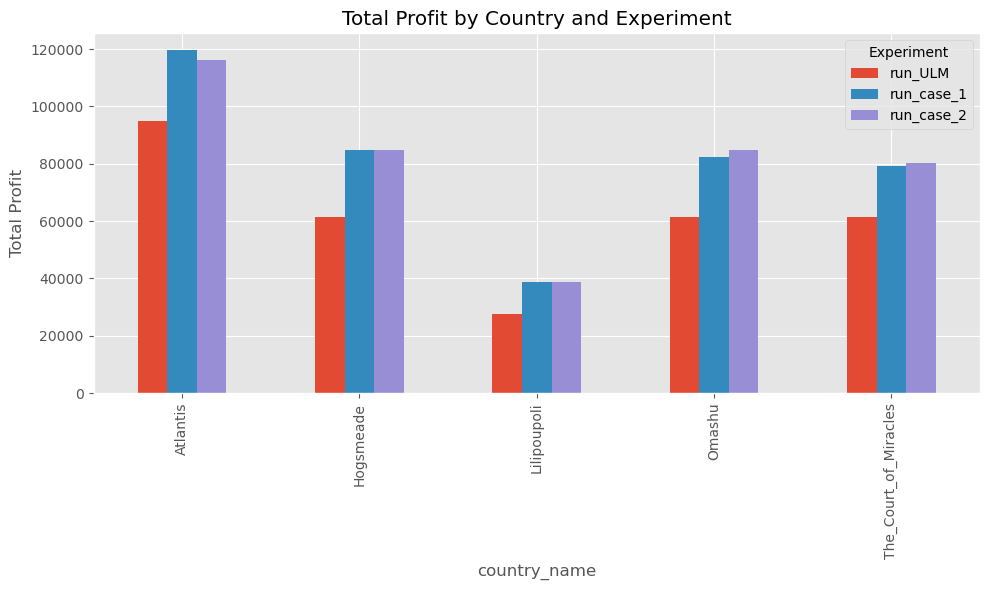

In [28]:
# 2) Bar Plot: Sum of Profits by Country and Experiment
# Drop the 'Total' row for plotting
pivot_country_profit_plot = pivot_country_profit.drop('Total')

# Plot
pivot_country_profit_plot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Total Profit')
plt.title('Total Profit by Country and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()

plt.show()



In [14]:
# 3) LaTeX Table: Sum of Profits by Sector and Experiment

# Merge df_firms with df_sectors to get sector names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_sectors = pd.merge(
    df_firms2,
    df_sectors[['id', 'name']],
    left_on='sector_id',
    right_on='id',
    suffixes=('', '_sector')
).rename(columns={'name': 'sector_name'})

# Group by 'run_name' and 'sector_name', sum 'profit'
grouped_sector_profit = df_firms_sectors.groupby(['run_name', 'sector_name'])['profit'].sum().reset_index()

# Pivot the data to have sectors as rows and run_names as columns
pivot_sector_profit = grouped_sector_profit.pivot(index='sector_name', columns='run_name', values='profit')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_sector_profit = pivot_sector_profit.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_sector_profit = pivot_sector_profit.fillna(0)

# Add a summary row
pivot_sector_profit.loc['Total'] = pivot_sector_profit.sum()

# Print LaTeX table
print("LaTeX Table: Sum of Profits by Sector and Experiment")
print(pivot_sector_profit.to_latex(float_format="%.2f"))

LaTeX Table: Sum of Profits by Sector and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
sector_name &  &  &  \\
\midrule
Automotive & 59791.26 & 68890.95 & 68890.95 \\
Cement & 59262.95 & 73586.37 & 70083.45 \\
Chemicals & 56694.04 & 64782.43 & 64782.43 \\
Paper & 38611.60 & 65789.53 & 69292.46 \\
Steel & 52687.59 & 63510.38 & 63510.38 \\
Textiles & 39266.36 & 68293.93 & 68293.93 \\
Total & 306313.79 & 404853.59 & 404853.59 \\
\bottomrule
\end{tabular}



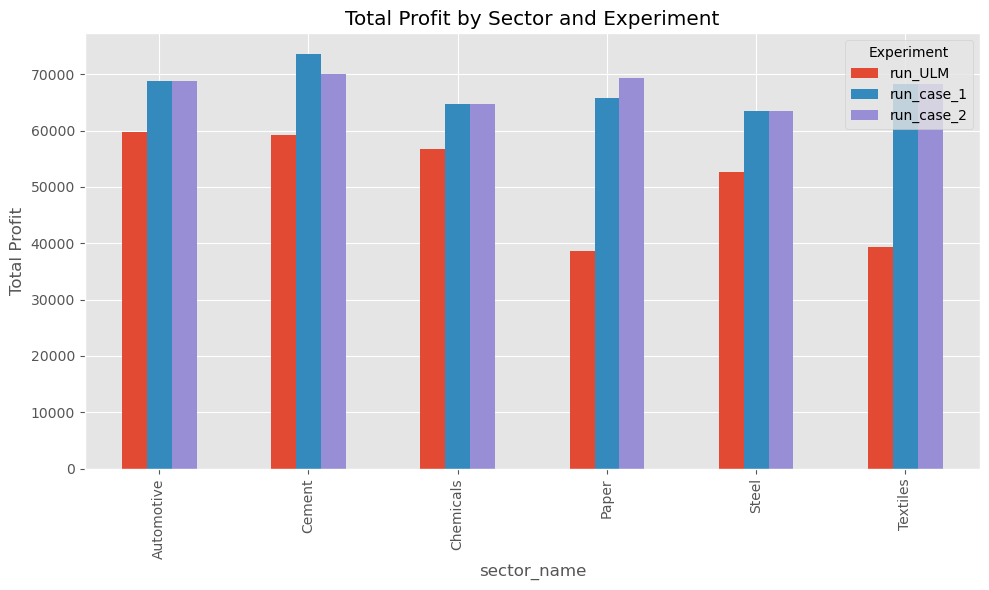

In [29]:
# 4) Bar Plot: Sum of Profits by Sector and Experiment

# Drop the 'Total' row for plotting
pivot_sector_profit_plot = pivot_sector_profit.drop('Total')

# Plot
pivot_sector_profit_plot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Total Profit')
plt.title('Total Profit by Sector and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()


In [16]:
# 5) LaTeX Table: Free Permits Allocation by Sector and Experiment

# Calculate total free permits for each firm
df_firms['total_free_permits'] = df_firms['exp7_free_allocation'] + df_firms['free_permits']

# Merge with sectors to get sector names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_sectors = pd.merge(
    df_firms2,
    df_sectors[['id', 'name']],
    left_on='sector_id',
    right_on='id',
    suffixes=('', '_sector')
).rename(columns={'name': 'sector_name'})

# Group by 'run_name' and 'sector_name', sum 'total_free_permits'
grouped_sector_permits = df_firms_sectors.groupby(['run_name', 'sector_name'])['total_free_permits'].sum().reset_index()

# Pivot the data to have sectors as rows and run_names as columns
pivot_sector_permits = grouped_sector_permits.pivot(index='sector_name', columns='run_name', values='total_free_permits')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_sector_permits = pivot_sector_permits.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_sector_permits = pivot_sector_permits.fillna(0)

# Add a summary row
pivot_sector_permits.loc['Total'] = pivot_sector_permits.sum()

# Print LaTeX table
print("LaTeX Table: Free Permits Allocation by Sector and Experiment")
print(pivot_sector_permits.to_latex(float_format="%.2f"))

LaTeX Table: Free Permits Allocation by Sector and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
sector_name &  &  &  \\
\midrule
Automotive & 912.62 & 691.95 & 691.95 \\
Cement & 2058.39 & 1276.81 & 1115.99 \\
Chemicals & 1231.22 & 756.85 & 756.85 \\
Paper & 154.38 & 1064.02 & 1224.85 \\
Steel & 1291.77 & 886.46 & 886.46 \\
Textiles & 0.00 & 968.34 & 968.34 \\
Total & 5648.37 & 5644.44 & 5644.44 \\
\bottomrule
\end{tabular}



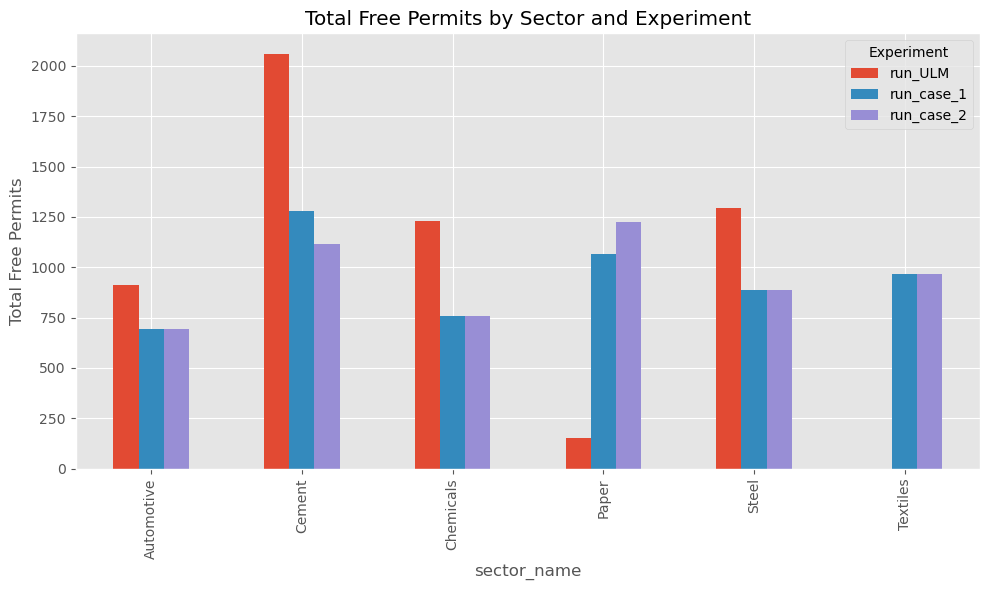

In [30]:
# 6) Bar Plot: Free Permits Allocation by Sector and Experiment

# Drop the 'Total' row for plotting
pivot_sector_permits_plot = pivot_sector_permits.drop('Total')

# Plot
pivot_sector_permits_plot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Total Free Permits')
plt.title('Total Free Permits by Sector and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()

In [18]:
# 7) LaTeX Table: Free Permits Allocation by Country and Experiment

# Merge df_firms with countries to get country names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_countries = pd.merge(
    df_firms2,
    df_countries[['id', 'name']],
    left_on='country_id',
    right_on='id',
    suffixes=('', '_country')
).rename(columns={'name': 'country_name'})

# Group by 'run_name' and 'country_name', sum 'total_free_permits'
grouped_country_permits = df_firms_countries.groupby(['run_name', 'country_name'])['total_free_permits'].sum().reset_index()

# Pivot the data to have countries as rows and run_names as columns
pivot_country_permits = grouped_country_permits.pivot(index='country_name', columns='run_name', values='total_free_permits')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_country_permits = pivot_country_permits.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_country_permits = pivot_country_permits.fillna(0)

# Add a summary row
pivot_country_permits.loc['Total'] = pivot_country_permits.sum()

# Print LaTeX table
print("LaTeX Table: Free Permits Allocation by Country and Experiment")
print(pivot_country_permits.to_latex(float_format="%.2f"))

LaTeX Table: Free Permits Allocation by Country and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
country_name &  &  &  \\
\midrule
Atlantis & 2045.95 & 1630.30 & 1469.48 \\
Hogsmeade & 1129.67 & 1305.85 & 1305.85 \\
Lilipoupoli & 213.40 & 462.08 & 462.08 \\
Omashu & 1129.67 & 1200.23 & 1305.69 \\
The_Court_of_Miracles & 1129.67 & 1045.98 & 1101.34 \\
Total & 5648.37 & 5644.44 & 5644.44 \\
\bottomrule
\end{tabular}



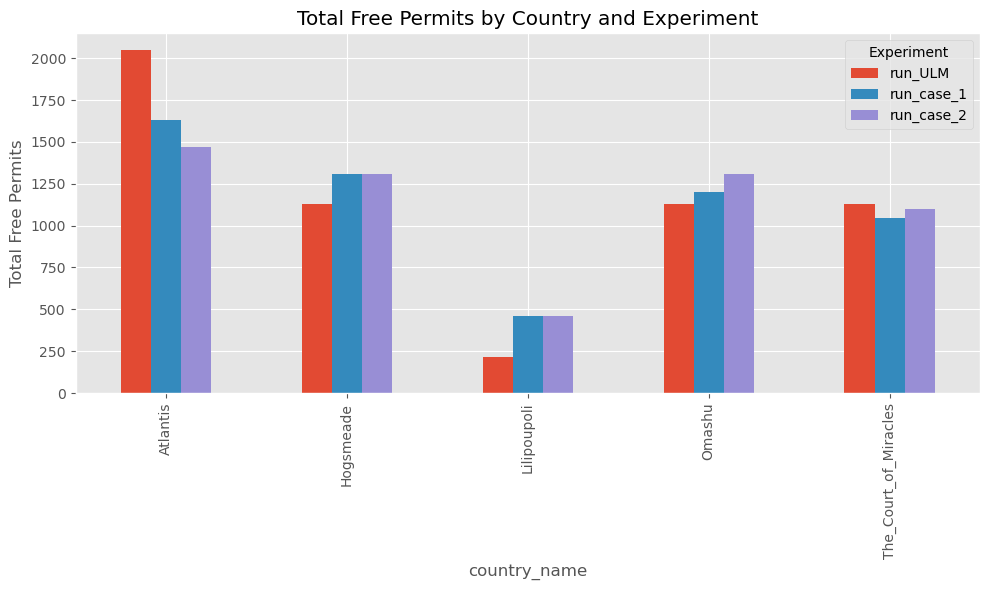

In [ ]:
# 8) Bar Plot: Free Permits Allocation by Country and Experiment

# Drop the 'Total' row for plotting
pivot_country_permits_plot = pivot_country_permits.drop('Total')

# Plot
pivot_country_permits_plot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Total Free Permits')
plt.title('Total Free Permits by Country and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()

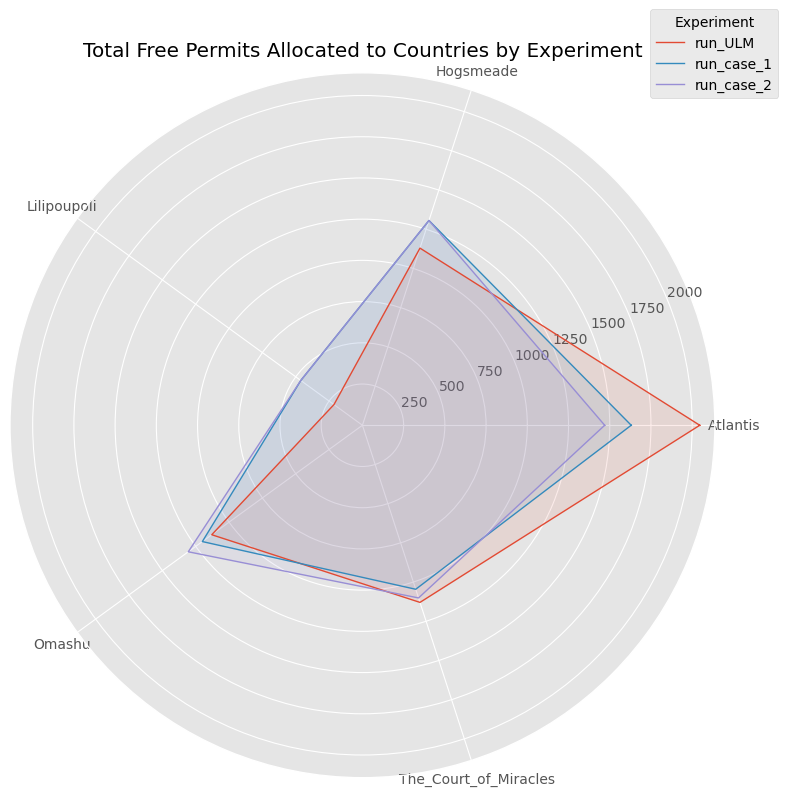

In [20]:
# 9) Radar Chart: Free Permits Allocation by Country and Experiment

def plot_radar_chart(data, categories, title, run_names):
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop

    # Initialize radar chart
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    # Plot each run
    for run in run_names:
        values = data.get(run, [0]*N)
        values += values[:1]
        ax.plot(angles, values, linewidth=1, label=run)
        ax.fill(angles, values, alpha=0.1)

    # Add category labels
    plt.xticks(angles[:-1], categories)

    # Add legend and title
    plt.legend(title='Experiment', loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Prepare data for radar chart by country
pivot_country_permits_no_total = pivot_country_permits.drop('Total')

countries = pivot_country_permits_no_total.index.tolist()
radar_data_countries = {run: pivot_country_permits_no_total[run].tolist() for run in RUN_NAMES}

# Plot radar chart for countries
plot_radar_chart(
    data=radar_data_countries,
    categories=countries,
    title='Total Free Permits Allocated to Countries by Experiment',
    run_names=RUN_NAMES
)

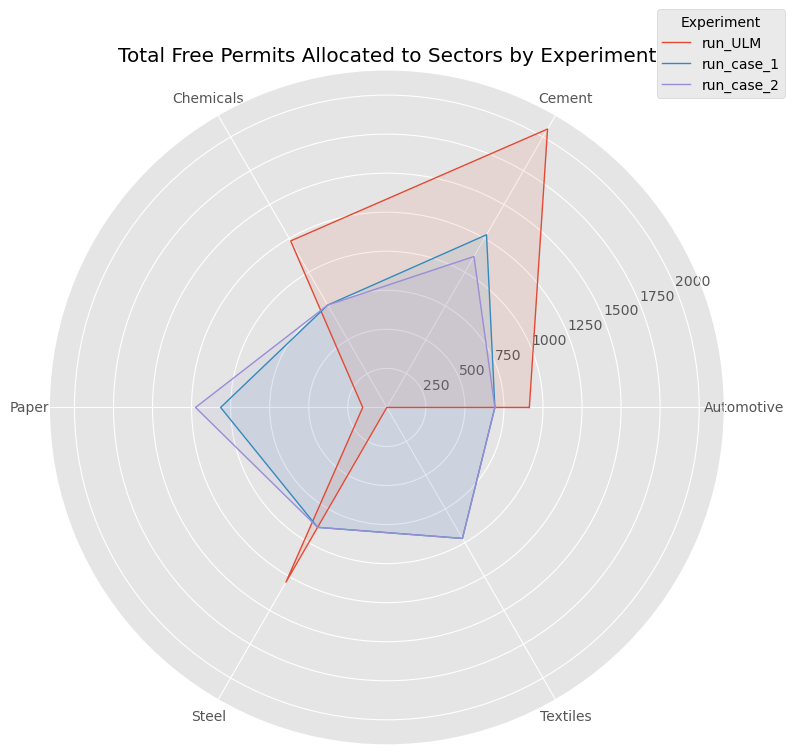

In [21]:
# 10) Radar Chart: Free Permits Allocation by Sector and Experiment

# Prepare data for radar chart by sector
pivot_sector_permits_no_total = pivot_sector_permits.drop('Total')

sectors = pivot_sector_permits_no_total.index.tolist()
radar_data_sectors = {run: pivot_sector_permits_no_total[run].tolist() for run in RUN_NAMES}

# Plot radar chart for sectors
plot_radar_chart(
    data=radar_data_sectors,
    categories=sectors,
    title='Total Free Permits Allocated to Sectors by Experiment',
    run_names=RUN_NAMES
)

In [22]:
# 1) LaTeX Table: Sum of Abatement by Country and Experiment
# -------------------------------

# Merge df_firms with df_countries to get country names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_countries = pd.merge(
    df_firms2,
    df_countries[['id', 'name']],
    left_on='country_id',
    right_on='id',
    suffixes=('', '_country')
).rename(columns={'name': 'country_name'})

# Group by 'run_name' and 'country_name', sum 'abatement'
grouped_country_abatement = df_firms_countries.groupby(['run_name', 'country_name'])['abatement'].sum().reset_index()

# Pivot the data to have countries as rows and run_names as columns
pivot_country_abatement = grouped_country_abatement.pivot(index='country_name', columns='run_name', values='abatement')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_country_abatement = pivot_country_abatement.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_country_abatement = pivot_country_abatement.fillna(0)

# Add a summary row for each experiment
pivot_country_abatement.loc['Total'] = pivot_country_abatement.sum()

# Print LaTeX table
print("LaTeX Table: Sum of Abatement by Country and Experiment")
print(pivot_country_abatement.to_latex(float_format="%.2f"))


LaTeX Table: Sum of Abatement by Country and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
country_name &  &  &  \\
\midrule
Atlantis & 189.17 & 136.43 & 136.43 \\
Hogsmeade & 128.02 & 93.00 & 93.00 \\
Lilipoupoli & 60.93 & 44.46 & 44.46 \\
Omashu & 144.85 & 105.39 & 105.39 \\
The_Court_of_Miracles & 135.53 & 97.98 & 97.98 \\
Total & 658.49 & 477.25 & 477.25 \\
\bottomrule
\end{tabular}



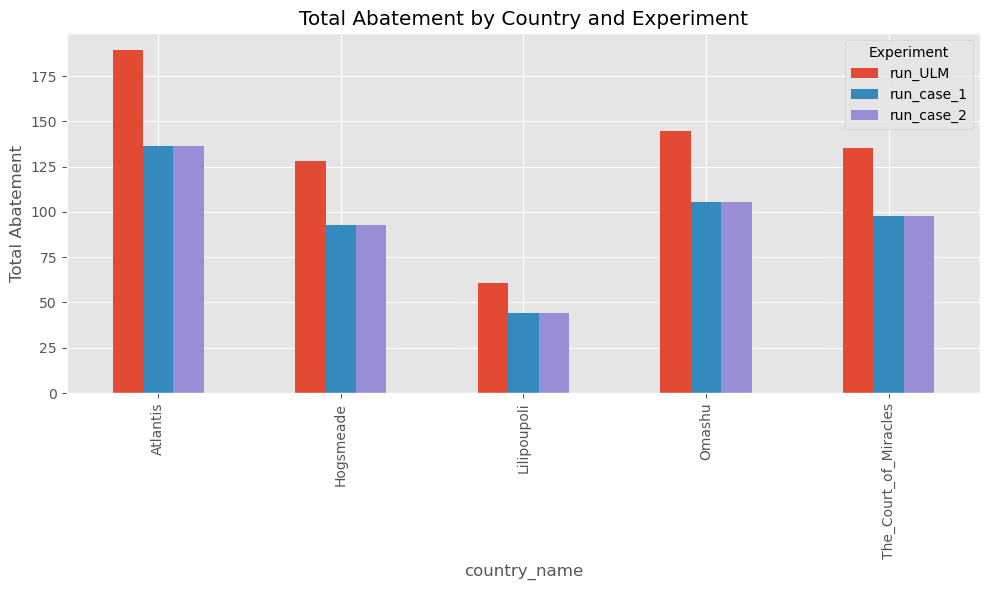

In [23]:
# 2) Bar Plot: Sum of Abatement by Country and Experiment
# -------------------------------

# Drop the 'Total' row for plotting
pivot_country_abatement_plot = pivot_country_abatement.drop('Total')

# Plot
pivot_country_abatement_plot.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Abatement')
plt.title('Total Abatement by Country and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()

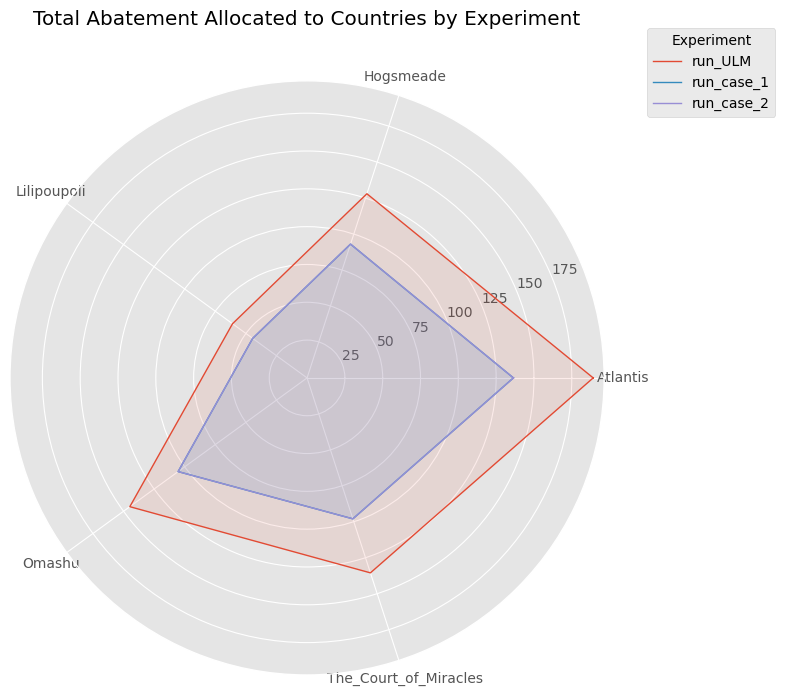

In [24]:
# 3) Radar Plot: Sum of Abatement by Country and Experiment
# -------------------------------

def plot_radar_chart(data, categories, title, run_names):
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop

    # Initialize radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each run
    for run in run_names:
        values = data.get(run, [0]*N)
        values += values[:1]
        ax.plot(angles, values, linewidth=1, label=run)
        ax.fill(angles, values, alpha=0.1)

    # Add category labels
    plt.xticks(angles[:-1], categories)

    # Add legend and title
    plt.legend(title='Experiment', loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(title, y=1.08)
    plt.tight_layout()
    plt.show()

# Prepare data for radar chart by country
pivot_country_abatement_no_total = pivot_country_abatement.drop('Total')

countries = pivot_country_abatement_no_total.index.tolist()
radar_data_countries = {run: pivot_country_abatement_no_total[run].tolist() for run in RUN_NAMES}


# Plot radar chart for countries
plot_radar_chart(
    data=radar_data_countries,
    categories=countries,
    title='Total Abatement Allocated to Countries by Experiment',
    run_names=RUN_NAMES
)

In [25]:
# -------------------------------
# 4) LaTeX Table: Sum of Abatement by Sector and Experiment
# -------------------------------

# Merge df_firms with df_sectors to get sector names
df_firms2 = df_firms
df_firms2 = df_firms2.drop(columns=['name'])
df_firms_sectors = pd.merge(
    df_firms2,
    df_sectors[['id', 'name']],
    left_on='sector_id',
    right_on='id',
    suffixes=('', '_sector')
).rename(columns={'name': 'sector_name'})

# Group by 'run_name' and 'sector_name', sum 'abatement'
grouped_sector_abatement = df_firms_sectors.groupby(['run_name', 'sector_name'])['abatement'].sum().reset_index()

# Pivot the data to have sectors as rows and run_names as columns
pivot_sector_abatement = grouped_sector_abatement.pivot(index='sector_name', columns='run_name', values='abatement')

# Reindex to ensure all RUN_NAMES are present as columns
pivot_sector_abatement = pivot_sector_abatement.reindex(columns=RUN_NAMES)

# Replace NaN with 0 if any
pivot_sector_abatement = pivot_sector_abatement.fillna(0)

# Add a summary row
pivot_sector_abatement.loc['Total'] = pivot_sector_abatement.sum()

# Print LaTeX table
print("LaTeX Table: Sum of Abatement by Sector and Experiment")
print(pivot_sector_abatement.to_latex(float_format="%.2f"))

LaTeX Table: Sum of Abatement by Sector and Experiment
\begin{tabular}{lrrr}
\toprule
run_name & run_ULM & run_case_1 & run_case_2 \\
sector_name &  &  &  \\
\midrule
Automotive & 90.81 & 64.95 & 64.95 \\
Cement & 118.06 & 85.99 & 85.99 \\
Chemicals & 96.49 & 69.15 & 69.15 \\
Paper & 121.67 & 88.72 & 88.72 \\
Steel & 109.79 & 79.73 & 79.73 \\
Textiles & 121.67 & 88.72 & 88.72 \\
Total & 658.49 & 477.25 & 477.25 \\
\bottomrule
\end{tabular}



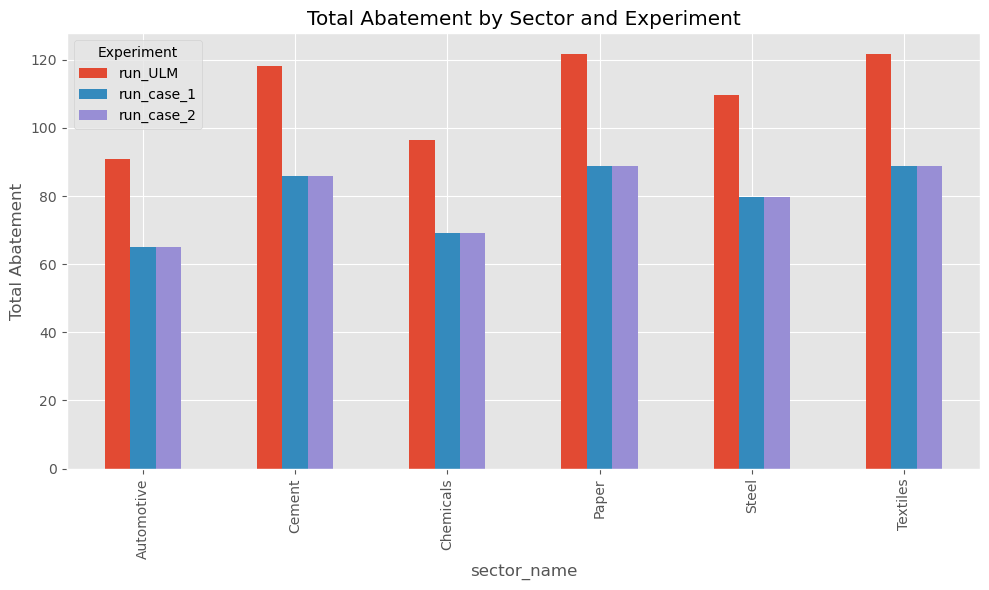

In [26]:
# -------------------------------
# 5) Bar Plot: Sum of Abatement by Sector and Experiment
# -------------------------------

# Drop the 'Total' row for plotting
pivot_sector_abatement_plot = pivot_sector_abatement.drop('Total')

# Plot
pivot_sector_abatement_plot.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Abatement')
plt.title('Total Abatement by Sector and Experiment')
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()

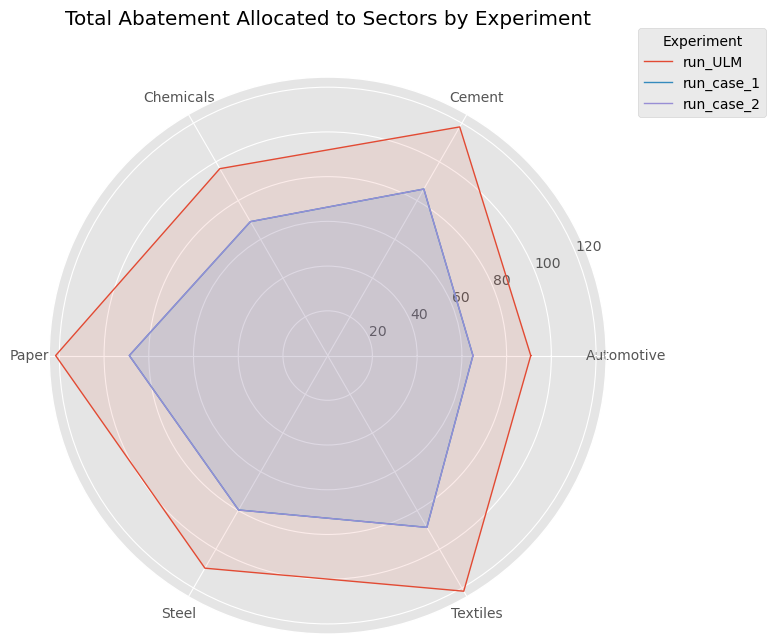

In [27]:
# -------------------------------
# 6) Radar Plot: Sum of Abatement by Sector and Experiment
# -------------------------------

# Prepare data for radar chart by sector
pivot_sector_abatement_no_total = pivot_sector_abatement.drop('Total')

sectors = pivot_sector_abatement_no_total.index.tolist()
radar_data_sectors = {run: pivot_sector_abatement_no_total[run].tolist() for run in RUN_NAMES}

# Plot radar chart for sectors
plot_radar_chart(
    data=radar_data_sectors,
    categories=sectors,
    title='Total Abatement Allocated to Sectors by Experiment',
    run_names=RUN_NAMES
)